<a href="https://colab.research.google.com/github/thatadi/cuddly-lamp/blob/main/Supervised%20Learning/Statistical_Analysis_(EDA)_with_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [ ]:
audi=pd.read_csv('audi.xls')
audi

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0
...,...,...,...,...,...,...,...,...,...
10663,A3,2020,16999,Manual,4018,Petrol,145,49.6,1.0
10664,A3,2020,16999,Manual,1978,Petrol,150,49.6,1.0
10665,A3,2020,17199,Manual,609,Petrol,150,49.6,1.0
10666,Q3,2017,19499,Automatic,8646,Petrol,150,47.9,1.4


In [ ]:
audi.describe()

,year,price,mileage,tax,mpg,engineSize
count,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000
mean,2017.100675,22896.685039,24827.244001,126.011436,50.770022,1.930709
std,2.167494,11714.841888,23505.257205,67.170294,12.949782,0.602957
min,1997.000000,1490.000000,1.000000,0.000000,18.900000,0.000000
25%,2016.000000,15130.750000,5968.750000,125.000000,40.900000,1.500000
50%,2017.000000,20200.000000,19000.000000,145.000000,49.600000,2.000000
75%,2019.000000,27990.000000,36464.500000,145.000000,58.900000,2.000000
max,2020.000000,145000.000000,323000.000000,580.000000,188.300000,6.300000


In [ ]:
audi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10668 entries, 0 to 10667
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10668 non-null  object 
 1   year          10668 non-null  int64  
 2   price         10668 non-null  int64  
 3   transmission  10668 non-null  object 
 4   mileage       10668 non-null  int64  
 5   fuelType      10668 non-null  object 
 6   tax           10668 non-null  int64  
 7   mpg           10668 non-null  float64
 8   engineSize    10668 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 750.2+ KB


In [ ]:
for i in audi.columns:
  if audi[i].dtypes=='object':
    print(audi[i].unique())

[' A1' ' A6' ' A4' ' A3' ' Q3' ' Q5' ' A5' ' S4' ' Q2' ' A7' ' TT' ' Q7'
 ' RS6' ' RS3' ' A8' ' Q8' ' RS4' ' RS5' ' R8' ' SQ5' ' S8' ' SQ7' ' S3'
 ' S5' ' A2' ' RS7']
['Manual' 'Automatic' 'Semi-Auto']
['Petrol' 'Diesel' 'Hybrid']


In [ ]:
sns.set_theme()

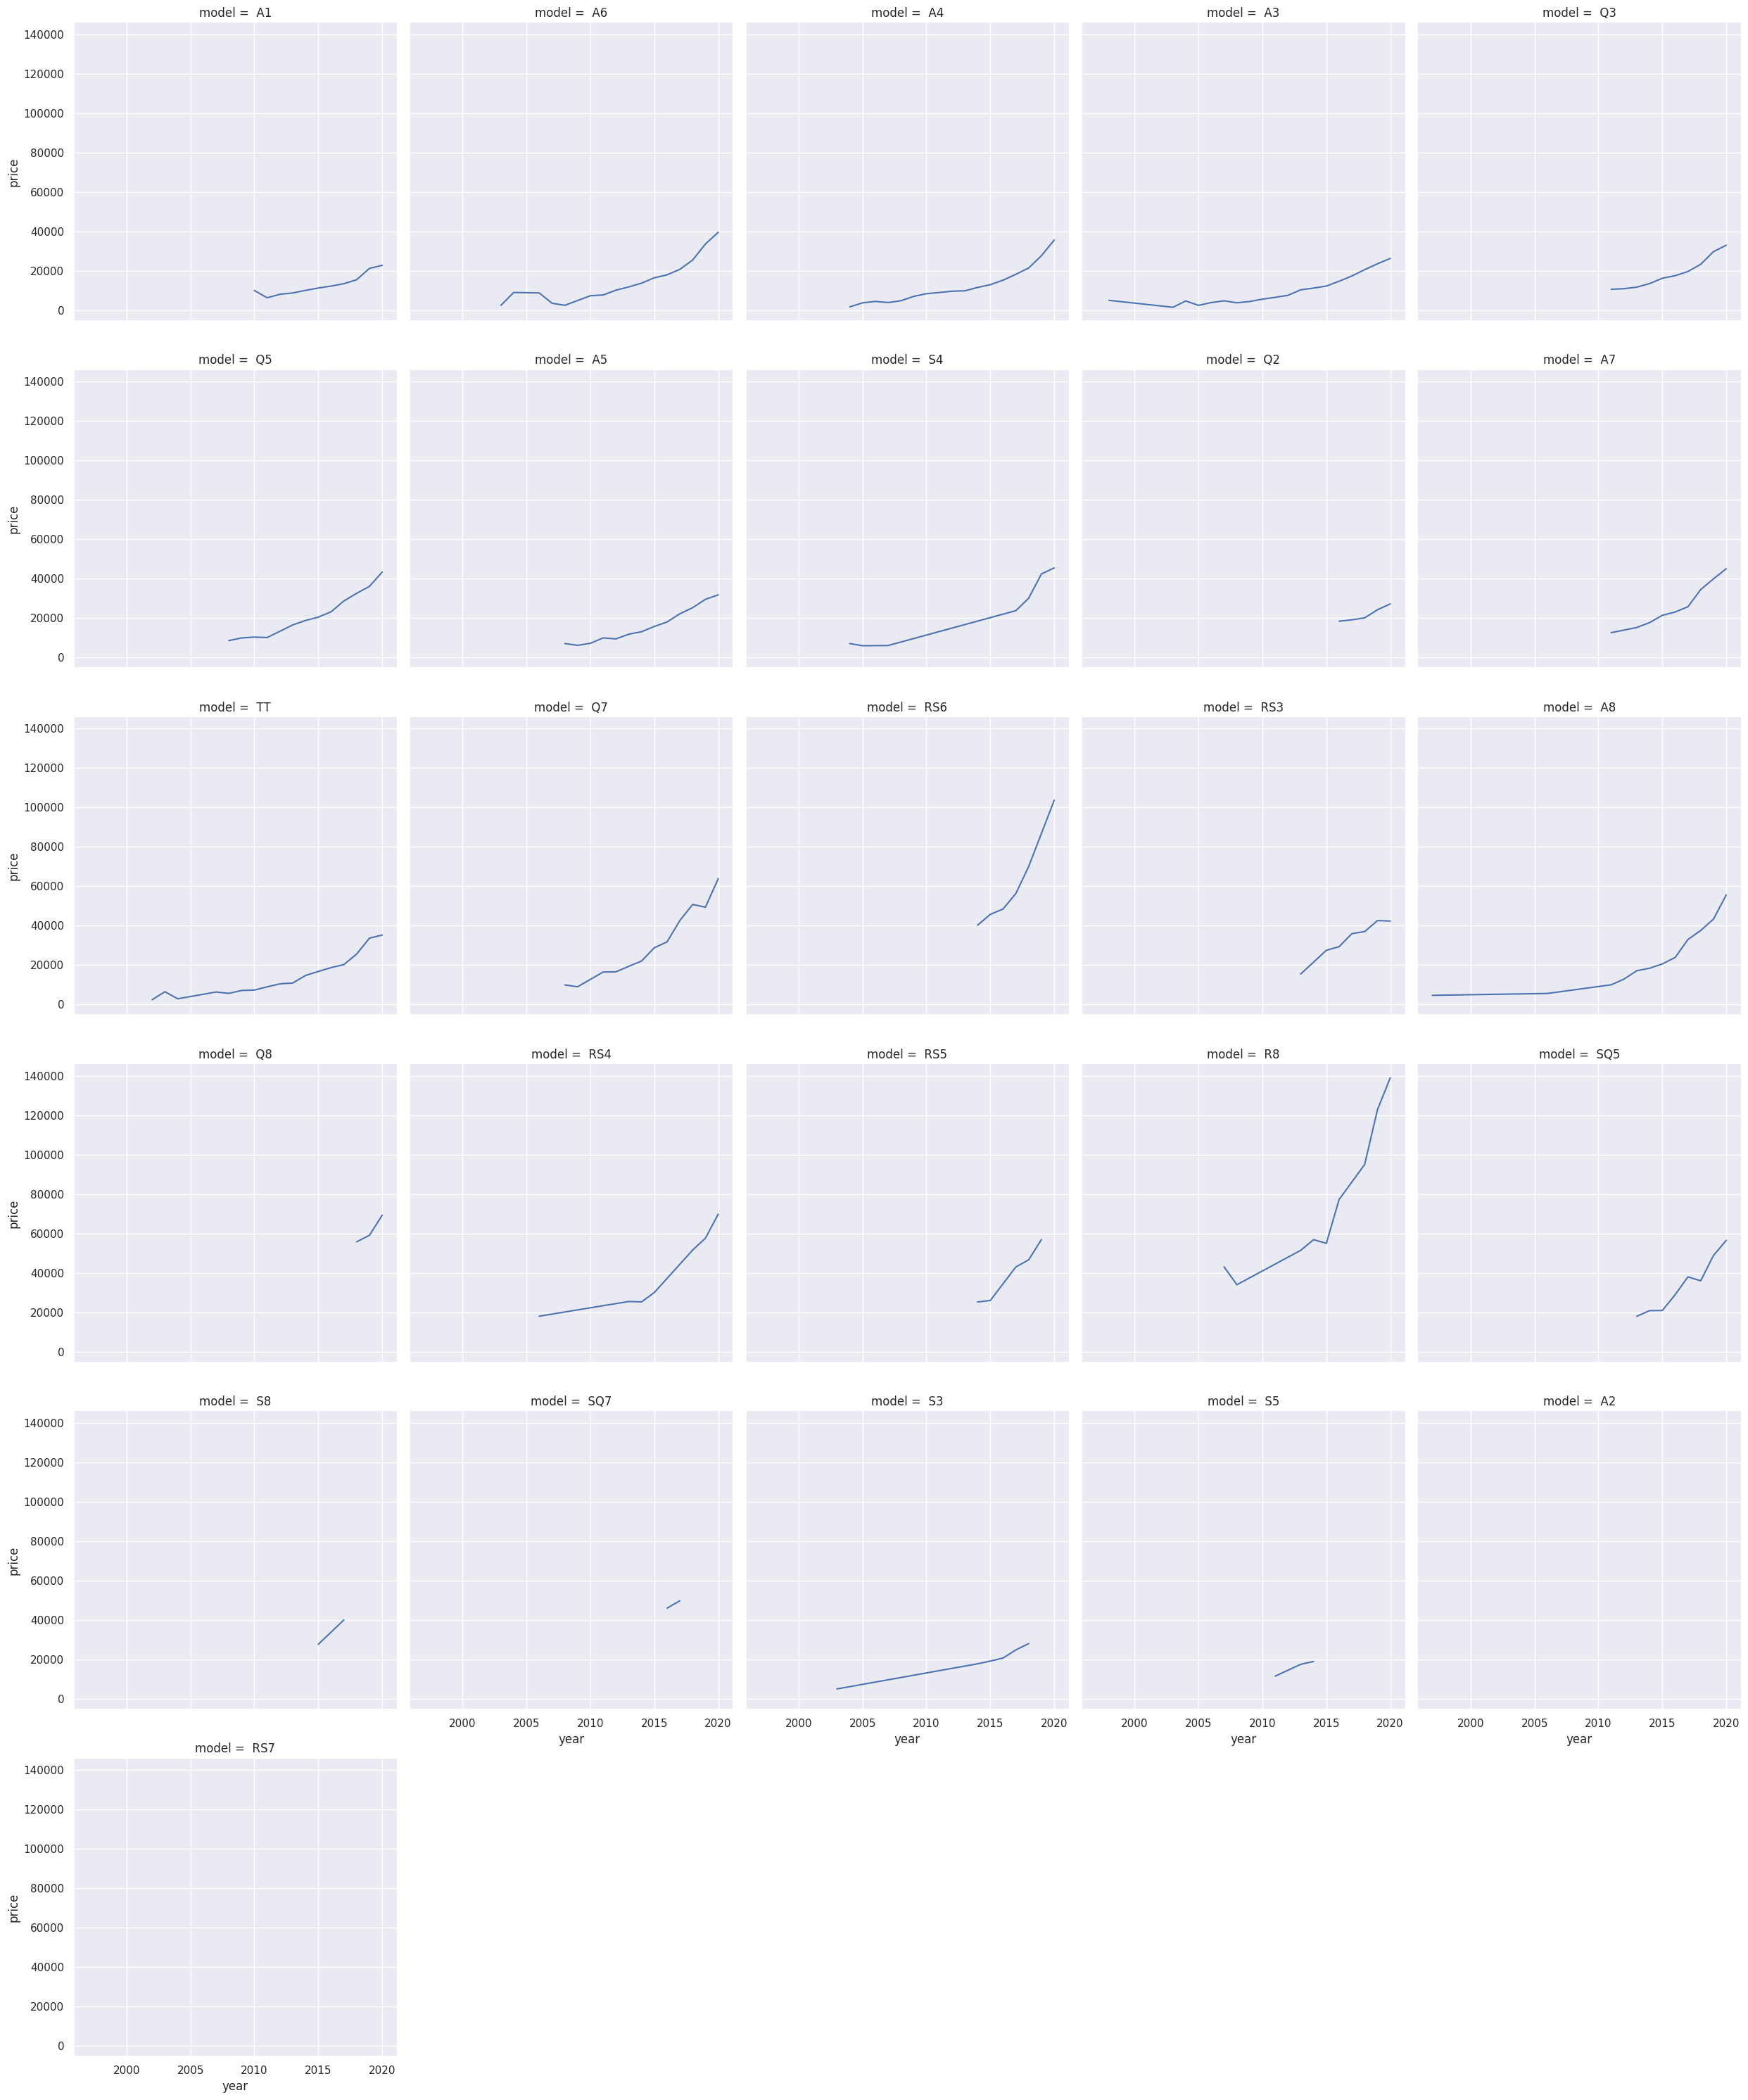

In [ ]:
sns.relplot(data=audi,col='model',x='year',y='price',kind='line',errorbar=None,col_wrap=5)

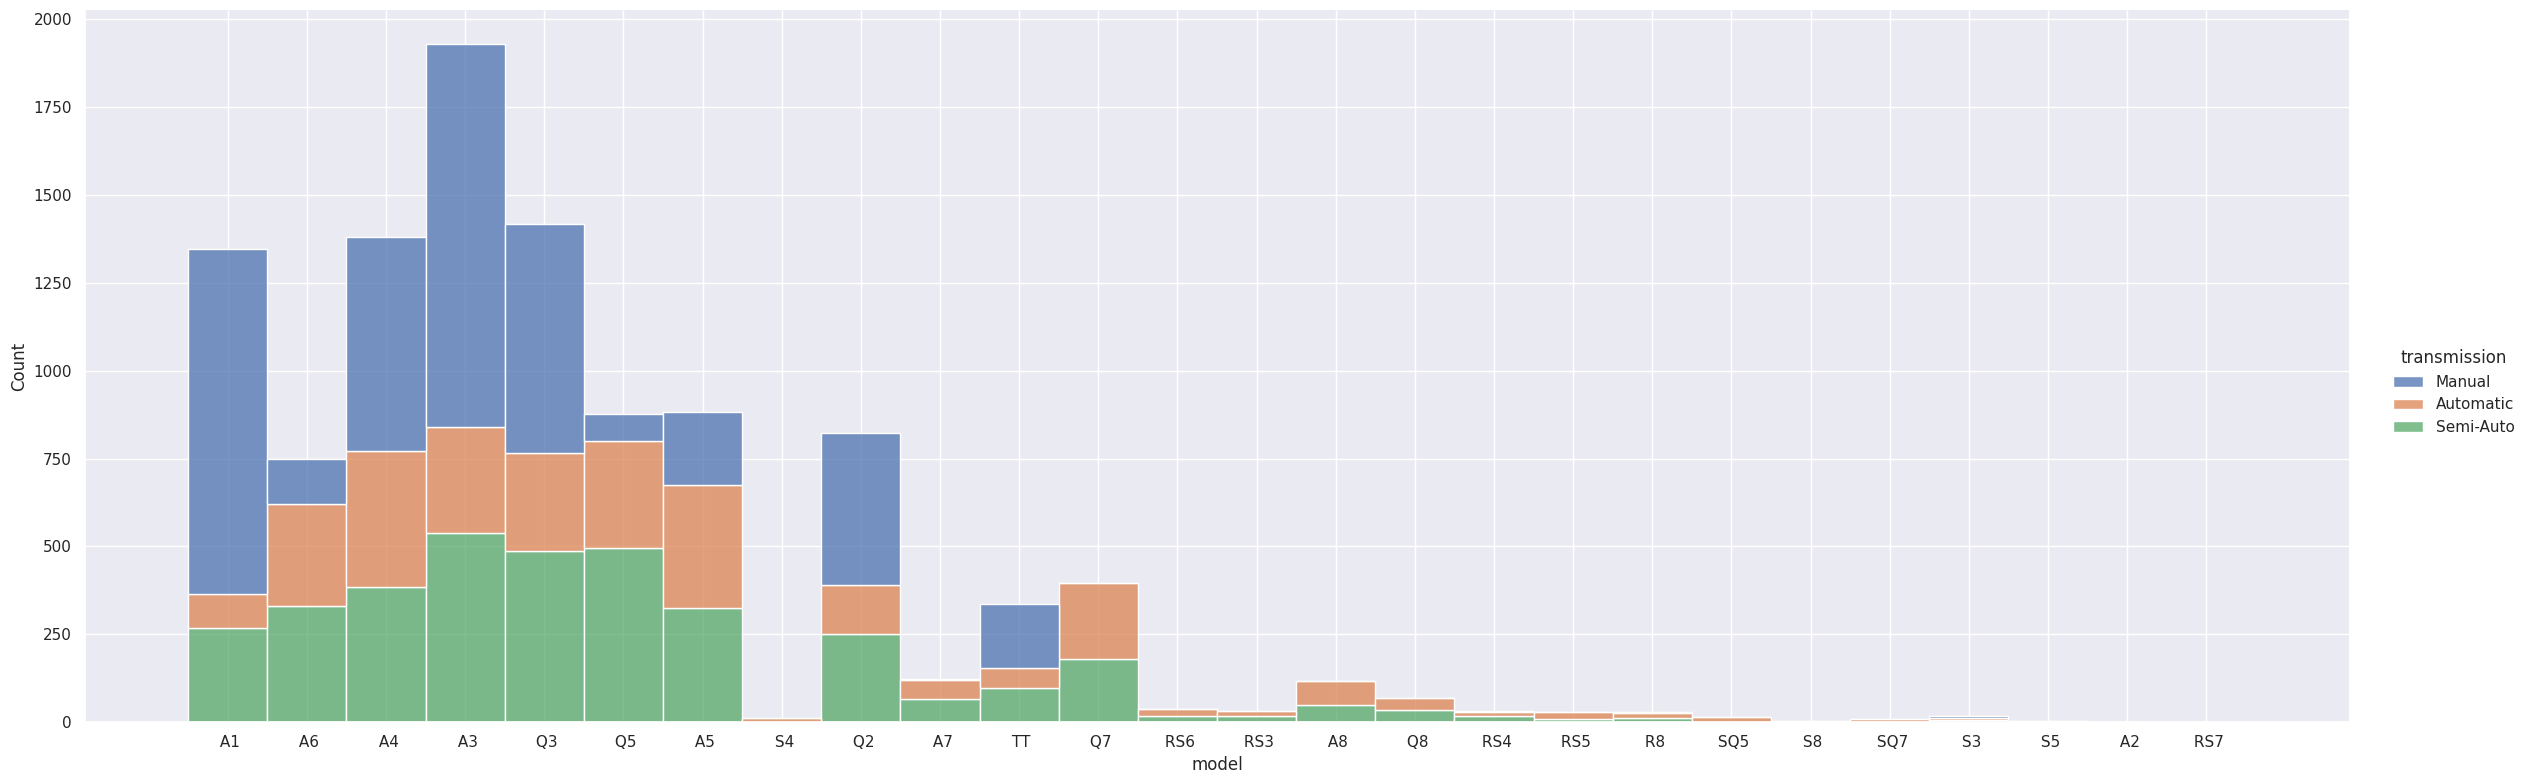

In [ ]:
sns.displot(audi,x='model',hue='transmission',multiple='stack',height=8, aspect=3)

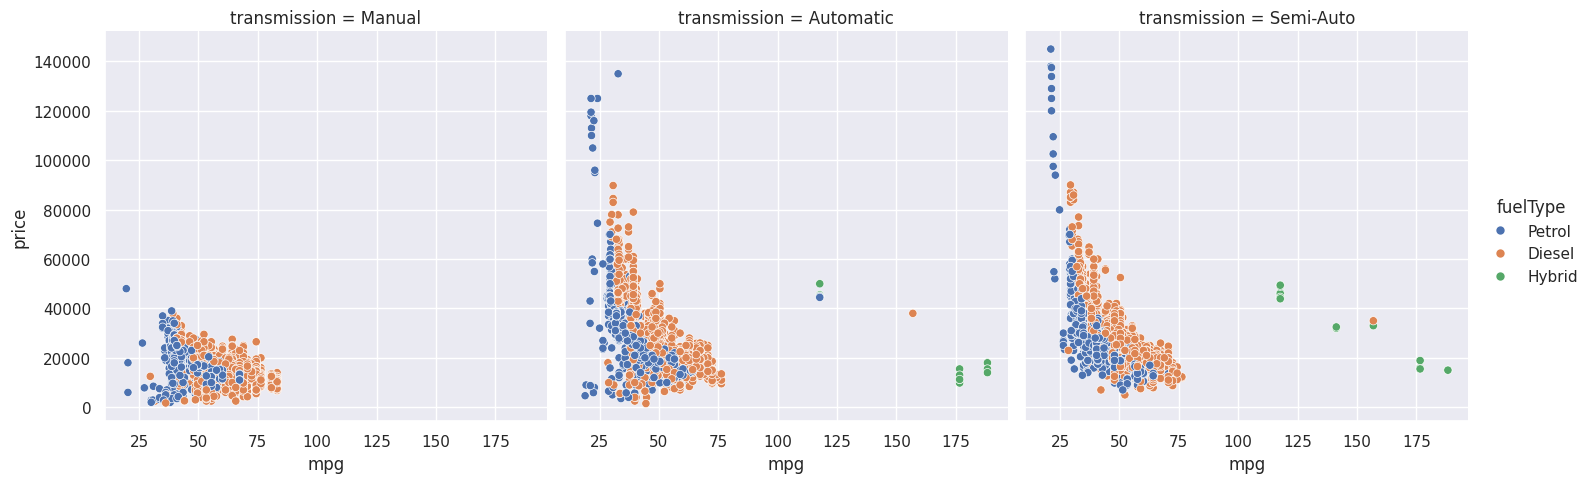

In [ ]:
sns.relplot(data=audi,col='transmission',x='mpg',y='price',hue='fuelType')

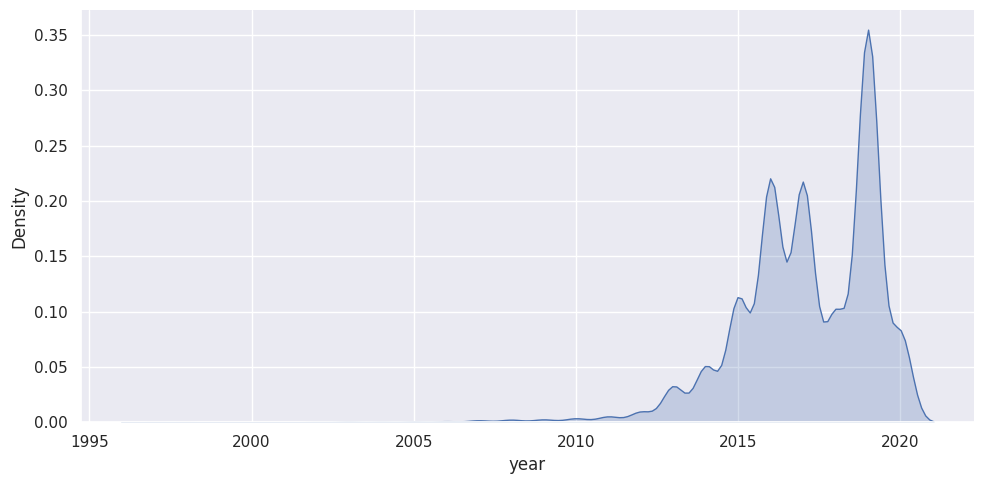

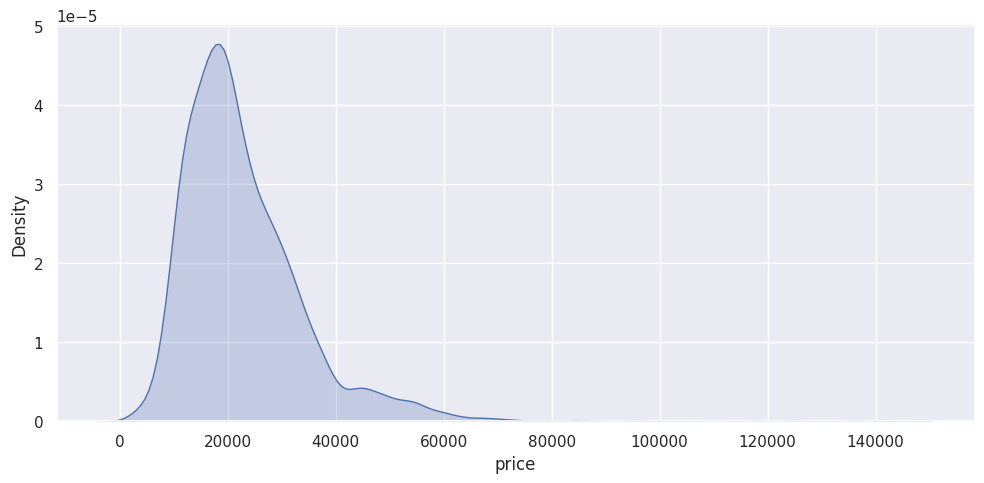

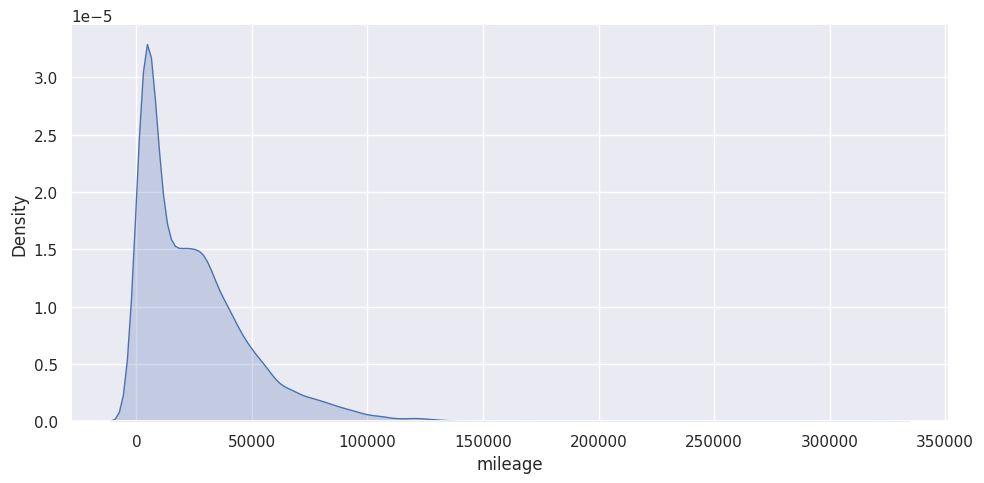

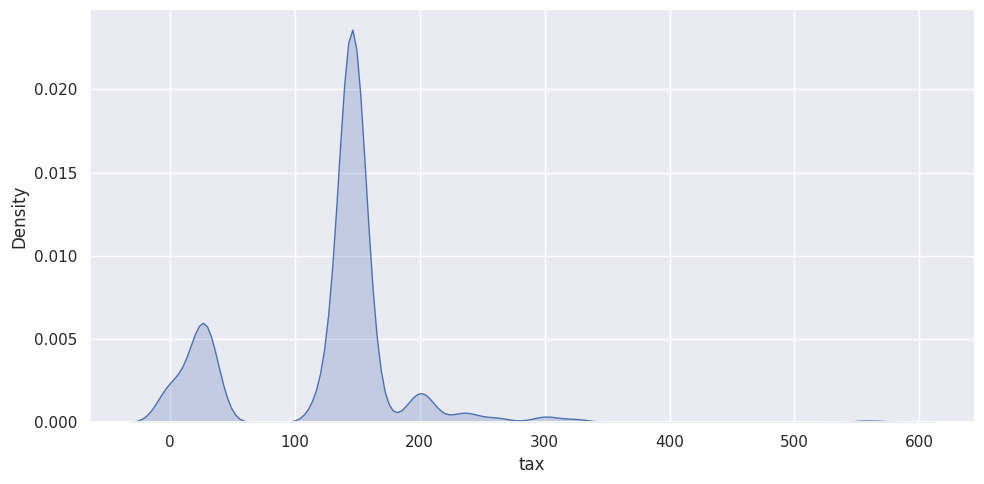

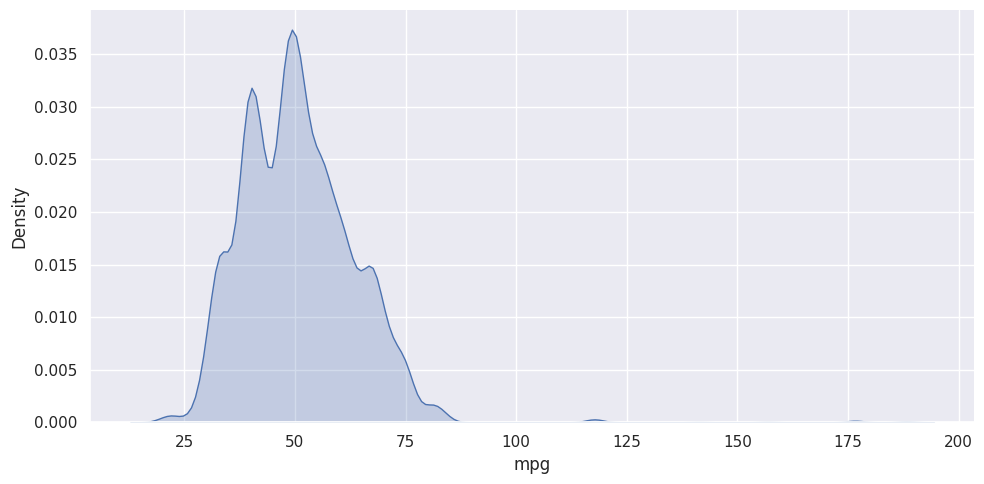

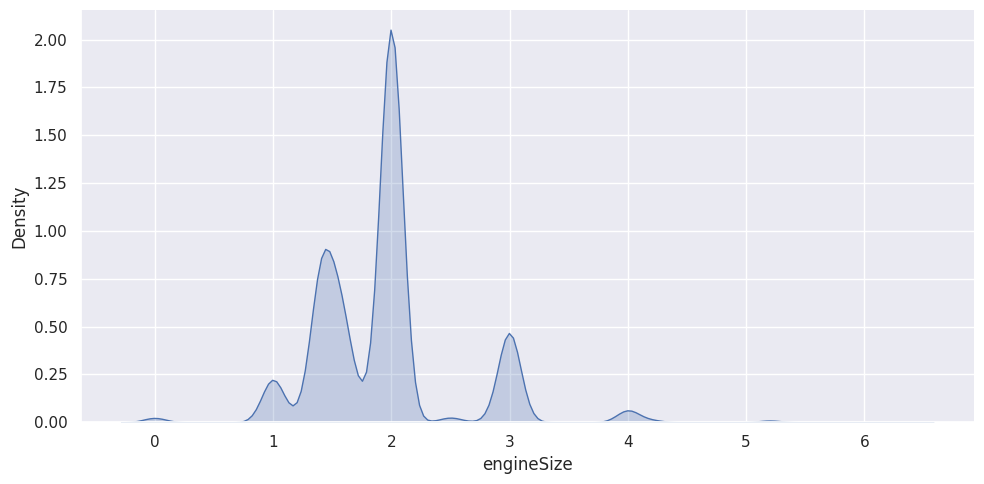

In [ ]:
c=[]
for i in audi.columns:
  if audi[i].dtypes!='object':
    sns.displot(audi,x=i,fill=True,kind='kde',height=5,aspect=2)
    c.append(i)

<Axes: >

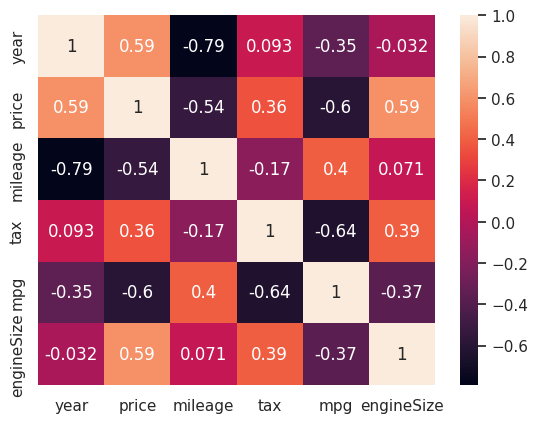

In [ ]:
cor_mat=audi[c]
cor_mat_p=cor_mat.corr(method='pearson')
sns.heatmap(cor_mat_p,annot=True)

<Axes: >

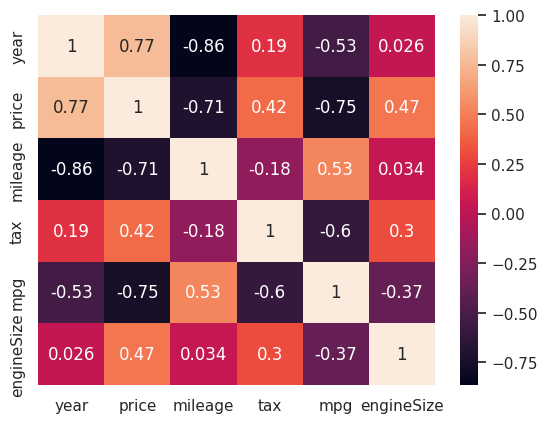

In [ ]:
cor_mat_s=cor_mat.corr(method='spearman')
sns.heatmap(cor_mat_s,annot=True)

In [ ]:
final=cor_mat
z=set()
for feat in final.columns:
  if final[feat].dtypes!='object':
    z_list=np.abs(zscore(final[feat]))
    for i in range(len(z_list)):
      if z_list[i]>3:
        z.add(i)

In [ ]:
for x in z:
  audi=audi.drop(x)
audi

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0
...,...,...,...,...,...,...,...,...,...
10663,A3,2020,16999,Manual,4018,Petrol,145,49.6,1.0
10664,A3,2020,16999,Manual,1978,Petrol,150,49.6,1.0
10665,A3,2020,17199,Manual,609,Petrol,150,49.6,1.0
10666,Q3,2017,19499,Automatic,8646,Petrol,150,47.9,1.4


In [ ]:
le=LabelEncoder()
audi['model'] = le.fit_transform(audi['model'])
audi['transmission'] = le.fit_transform(audi['transmission'])
audi['fuelType'] = le.fit_transform(audi['fuelType'])
audi

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,0,2017,12500,1,15735,1,150,55.4,1.4
1,4,2016,16500,0,36203,0,20,64.2,2.0
2,0,2016,11000,1,29946,1,30,55.4,1.4
3,2,2017,16800,0,25952,0,145,67.3,2.0
4,1,2019,17300,1,1998,1,145,49.6,1.0
...,...,...,...,...,...,...,...,...,...
10663,1,2020,16999,1,4018,1,145,49.6,1.0
10664,1,2020,16999,1,1978,1,150,49.6,1.0
10665,1,2020,17199,1,609,1,150,49.6,1.0
10666,8,2017,19499,0,8646,1,150,47.9,1.4


In [ ]:
scale=MinMaxScaler()
audi=pd.DataFrame(scale.fit_transform(audi),columns=audi.columns)
audi

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,0.000000,0.666667,0.136786,0.5,0.165518,1.0,0.461538,0.511464,0.2
1,0.210526,0.555556,0.212673,0.0,0.380891,0.0,0.061538,0.666667,0.5
2,0.000000,0.555556,0.108329,0.5,0.315052,1.0,0.092308,0.511464,0.2
3,0.105263,0.666667,0.218365,0.0,0.273026,0.0,0.446154,0.721340,0.5
4,0.052632,0.888889,0.227851,0.5,0.020971,1.0,0.446154,0.409171,0.0
...,...,...,...,...,...,...,...,...,...
10091,0.052632,1.000000,0.222140,0.5,0.042227,1.0,0.446154,0.409171,0.0
10092,0.052632,1.000000,0.222140,0.5,0.020761,1.0,0.461538,0.409171,0.0
10093,0.052632,1.000000,0.225934,0.5,0.006356,1.0,0.461538,0.409171,0.0
10094,0.421053,0.666667,0.269569,0.0,0.090924,1.0,0.461538,0.379189,0.2


In [ ]:
y=audi['price']
x=audi.drop('price',axis=1)
x

,model,year,transmission,mileage,fuelType,tax,mpg,engineSize
0,0.000000,0.666667,0.5,0.165518,1.0,0.461538,0.511464,0.2
1,0.210526,0.555556,0.0,0.380891,0.0,0.061538,0.666667,0.5
2,0.000000,0.555556,0.5,0.315052,1.0,0.092308,0.511464,0.2
3,0.105263,0.666667,0.0,0.273026,0.0,0.446154,0.721340,0.5
4,0.052632,0.888889,0.5,0.020971,1.0,0.446154,0.409171,0.0
...,...,...,...,...,...,...,...,...
10091,0.052632,1.000000,0.5,0.042227,1.0,0.446154,0.409171,0.0
10092,0.052632,1.000000,0.5,0.020761,1.0,0.461538,0.409171,0.0
10093,0.052632,1.000000,0.5,0.006356,1.0,0.461538,0.409171,0.0
10094,0.421053,0.666667,0.0,0.090924,1.0,0.461538,0.379189,0.2


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [ ]:
alpha=np.logspace(-3, 3,15)
model=RidgeCV(cv=10,alphas=alpha)
model.fit(x_train,y_train)

RidgeCV(alphas=array([1.00000000e-03, 2.68269580e-03, 7.19685673e-03, 1.93069773e-02,
       5.17947468e-02, 1.38949549e-01, 3.72759372e-01, 1.00000000e+00,
       2.68269580e+00, 7.19685673e+00, 1.93069773e+01, 5.17947468e+01,
       1.38949549e+02, 3.72759372e+02, 1.00000000e+03]),
        cv=10)

In [ ]:
y_hat=model.predict(x_test)

In [ ]:
model.score(x_test,y_test)

0.8544655584797942

In [ ]:
lrr=mean_squared_error(y_test, y_hat)

In [ ]:
lr=LinearRegression()
lr.fit(x_train,y_train)
yhat=lr.predict(x_test)

In [ ]:
lr.score(x_test,y_test)

0.8544607777386118

In [ ]:
lre=mean_squared_error(y_test, yhat)

In [ ]:
if lre>lrr:
  print('Ridge Regression is better')
else:
  print('Linear Regression is better')

Ridge Regression is better


In [ ]:
error_percent=((lre-lrr)*100)/lrr
print(f"Ridge Regression is better than Linear Regression by {error_percent}%")

Ridge Regression is better than Linear Regression by 0.0032849551847460253%
